# 2024-03-14
## Python Study for PBI Lab Crew

# 킹갓엠페러제너럴충무공마제스티하이퍼울트라
# SCIKIT-LEARN
https://scikit-learn.org/stable/

# 오늘 학습 목표 
## 1. 왜 머신러닝인가
## 2. 어떻게 학습되는 가
## 3. 차원이란?
## 4. KNN 해보기
## 5. SVM 해보기 


### 다음 주 모델 로스, opt, 이론 

## 아직까지도 많은 사람들이 뭐가 AI, ML(기계학습)과  DL(Deep Learning)을 혼동해요
![img](https://upload.wikimedia.org/wikipedia/commons/6/68/AI_relation_to_Generative_Models_subset%2C_venn_diagram.png)

간단하게 생각하면<br>
모델이 판단을 하는 가 -> AI <br>
모델이 학습이 가능한 가 -> ML <br>
신경망 구조를 가지는 가 -> DL (NN) <br>
모델의 결과가 없던 것인가 -> GM <br>

![img](수업자료1.png)

![img](수업자료2.png)

![img](수업자료3.png)

# 그럼 왜? 우리는 모델이 학습한다 라고 하는 것인가

## "주어진" 데이터로부터 "스스로" 파라미터(웨이트 등)을 수정해가며 더 나은 성능을 가지는 모델이 되어간다. "새로운" 데이터에서도 유의한 성능을 낼 수 있다.

위 문장을 통해서 알 수 있는 것처럼 기계학습 모델은 주어진 데이터를 학습하여 새로운 데이터에서도 성능을 낼 수 있는 모델을 말합니다.<br>
 학습을 하는 과정은 성능을 평가하는 과정, 스스로 파라미터를 Update 하는 과정으로 크게 나눌 수 있습니다. 두 과정을 반복하며 더 나은 모델이 되어가는 것이죠<br>
 이렇게 학습하는 것을 fit/fitting 이라합니다.
 
아무리 주어진 학습에 대하여 높은 성능을 가지더라도 새로운 데이터에 성능이 시원찮다면 옳바르게 학습된 모델이라 보기힘들다. 아래 그림을 보면 쉽게 이해할 수 있다.

![img](수업자료4.png)


이처럼 모델을 적절하게 학습시키는 것이 중요한데 그것을 위한 학습방법이 아래와 같다.

![img](수업자료5.png)

먼저 모델 학습에 사용될 데이터, 학습시 성능평가를 위한 데이터와 모델의 성능평가를 위한 데이터로 각각 나누어야 한다. 

![img](수업자료6.png)

    학습시 성능평가를 위한 데이터를 모델이 학습하지 않는 것은 데이터가 충분하지 않을 때 데이터를 낭비하는 것이기 때문에 이를 보완하기위해 위 같은 CV 방법을 사용한다.

# 차원??

![img](수업자료7.png)

![img](수업자료8.png)

![img](수업자료9.png)

![img](수업자료10.png)

![img](수업자료11.png)

## cf> 새로운 공간으로 데이터를 변환하는 것을 임베딩(Embedding)이라 합니다. ex> 자연어 -> 벡터 

우리는 차원 축소 방법 PCA와 UMAP을 각각 실습해볼 예정입니다.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns
from sklearn.decomposition import PCA
import umap





tmm = pd.read_csv("kyuchan.TMM.matrix",sep = "\t", index_col=0)
tmm = tmm[['N10-na1', 'N10-na2', 'N10-na3', 'N10-na4', 'N10-na5', 'N11-na1',
       'N11-na2', 'N11-na3', 'N11-na4', 'N11-na5', 'P10-dh1', 'P10-dh2',
       'P10-dh3', 'P10-dh4', 'P10-dh5', 'P10-ur1', 'P10-ur2', 'P10-ur3',
       'P10-ur4', 'P10-ur5', 'P11-an1', 'P11-an2', 'P11-an3', 'P11-an4',
       'P11-an5', 'P11-as1', 'P11-as2', 'P11-as3', 'P11-as4', 'P11-as5']]
samples = pd.DataFrame()
samples["Sample"] = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [4]:
samples

,Sample
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [5]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.dpi"] = 200

In [6]:
def Sample_PCA(TPM_df,Samples_df):
    pca_data =TPM_df.T
    pca = PCA(n_components=2)

    pca.fit(pca_data)
    x_pca = pca.transform(pca_data)

    pca_df = pd.DataFrame(x_pca)
    pca_df['Sample'] = Samples_df["Sample"]
    pca_df.head()

    sns.scatterplot(data=pca_df, x=0, y=1, hue='Sample')
    
    plt.xlabel("PC 1 [{}%]".format(round(pca.explained_variance_ratio_[0]*100,2)))
    plt.ylabel("PC 2 [{}%]".format(round(pca.explained_variance_ratio_[1]*100,2)))
    plt.legend(loc = 2, bbox_to_anchor = (1,1))

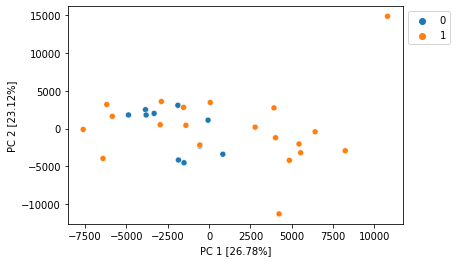

In [14]:
pca_data =tmm.T
pca = PCA(n_components=2)

pca.fit(pca_data)
x_pca = pca.transform(pca_data)

pca_df = pd.DataFrame(x_pca)
pca_df['Sample'] = samples["Sample"]
pca_df.head()

sns.scatterplot(data=pca_df, x=0, y=1, hue='Sample')
    
plt.xlabel("PC 1 [{}%]".format(round(pca.explained_variance_ratio_[0]*100,2)))
plt.ylabel("PC 2 [{}%]".format(round(pca.explained_variance_ratio_[1]*100,2)))
plt.legend(loc = 2, bbox_to_anchor = (1,1))

In [24]:
def Sample_UMAP(TPM_df,Samples_df):
    reducer = umap.UMAP()

    # Fit the UMAP object to the data and transform the data to 2D
    embedding = reducer.fit_transform(TPM_df.T)
    umap_df = pd.DataFrame(embedding)
    umap_df['Fireblight'] = samples["Sample"]
    umap_df.head()
    # Visualize the results using matplotlib
    sns.scatterplot(data=umap_df, x=0, y=1, hue='Fireblight')
    plt.legend(loc = 1, bbox_to_anchor = (0,0))
    

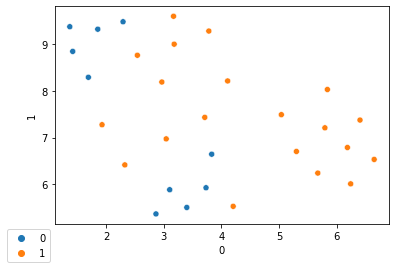

In [25]:
Sample_UMAP(tmm, samples)

## 생각해보기 
UMAP은 Clustering을 하기전에 사용하는 차원 축소방법으로 널리 사용되고 있습니다. 그에 비해 현재 PCA는 다른 분석의 전처리 과정으로서 사용되어지는 데 한계가 있는데요. 왜 그럴지 아래 셀에 작성해서 저에게 보여주세요 ^^

In [36]:
PCA는 데이터 자체의 의미 포함하지 않고, 분포를 기반으로 관계만 나타냄, UMAP은 데이터 자체의 의미를 포함한다.

SyntaxError: invalid syntax (4081281241.py, line 1)

# KNN 구연하기

![img](https://miro.medium.com/v2/resize:fit:640/format:webp/1*X1KBJctko0RH6BWBsu-XjA.png)

In [27]:
from sklearn import neighbors, datasets    # KNN운 neighbors에, 실습할 데이터 iris는 datasets에
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap # KNN의 분류 영역 표시를 위한 컬러맵
import mglearn


In [28]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(tmm.T, samples["Sample"], test_size = 0.1, random_state = 0)

In [35]:
tsty

2     0
28    1
13    1
Name: Sample, dtype: int64

In [32]:
tstx

Gene_ID,nbis-gene-1,nbis-gene-10,nbis-gene-100,nbis-gene-1000,nbis-gene-10000,nbis-gene-10001,nbis-gene-10002,nbis-gene-10003,nbis-gene-10004,nbis-gene-10005,...,nbis-gene-9990,nbis-gene-9991,nbis-gene-9992,nbis-gene-9993,nbis-gene-9994,nbis-gene-9995,nbis-gene-9996,nbis-gene-9997,nbis-gene-9998,nbis-gene-9999
N10-na3,4.464,11.304,0.0,47.662,46.661,31.331,0.160,0.0,38.236,51.053,...,9.835,2.175,148.758,1.165,0.379,0.116,33.412,20.637,0.000,282.691
P11-as4,4.570,11.596,0.0,38.950,41.101,21.189,1.388,0.0,34.014,34.084,...,12.111,3.732,245.163,2.473,3.572,0.314,36.838,18.841,0.760,258.064
P10-dh4,5.130,14.481,0.0,37.911,36.616,22.725,0.433,0.0,39.886,40.832,...,14.450,1.422,315.903,2.504,2.905,0.522,43.900,24.231,0.426,336.708


## 일부데이터를 UMAP을 fitting 합니다.

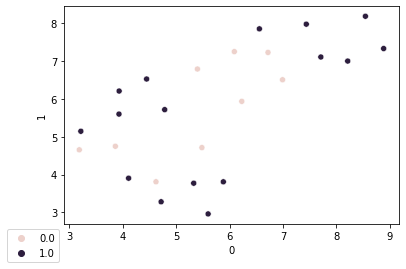

In [29]:
reducer = umap.UMAP()

# Fit the UMAP object to the data and transform the data to 2D
embedding = reducer.fit_transform(trnx)
umap_df = pd.DataFrame(embedding)
umap_df['Fireblight'] = trny
umap_df.head()

# Visualize the results using matplotlib
sns.scatterplot(data=umap_df, x=0, y=1, hue='Fireblight')
plt.legend(loc = 1, bbox_to_anchor = (0,0))

In [30]:
tstx_UMAP = reducer.transform(tstx)

In [40]:
clf

KNeighborsClassifier(n_neighbors=9)

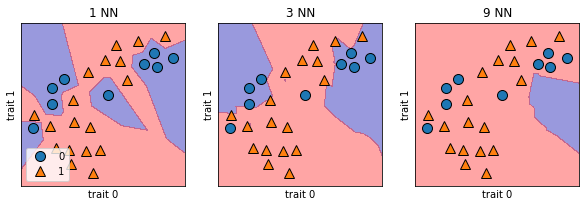

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.dpi"] = 200

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메서드는 self 객체를 반환합니다.
    # 그래서 객체 생성과 fit 메서드를 한 줄에 쓸 수 있습니다.
    clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors).fit(embedding, trny)
    mglearn.plots.plot_2d_separator(clf, embedding, fill=True, eps=0.5, 
                                    ax=ax, alpha=.4)
    mglearn.discrete_scatter(embedding[:, 0], embedding[:, 1], trny, ax=ax)
    ax.set_title("{} NN".format(n_neighbors))
    ax.set_xlabel("trait 0")
    ax.set_ylabel("trait 1")
axes[0].legend(loc=3)


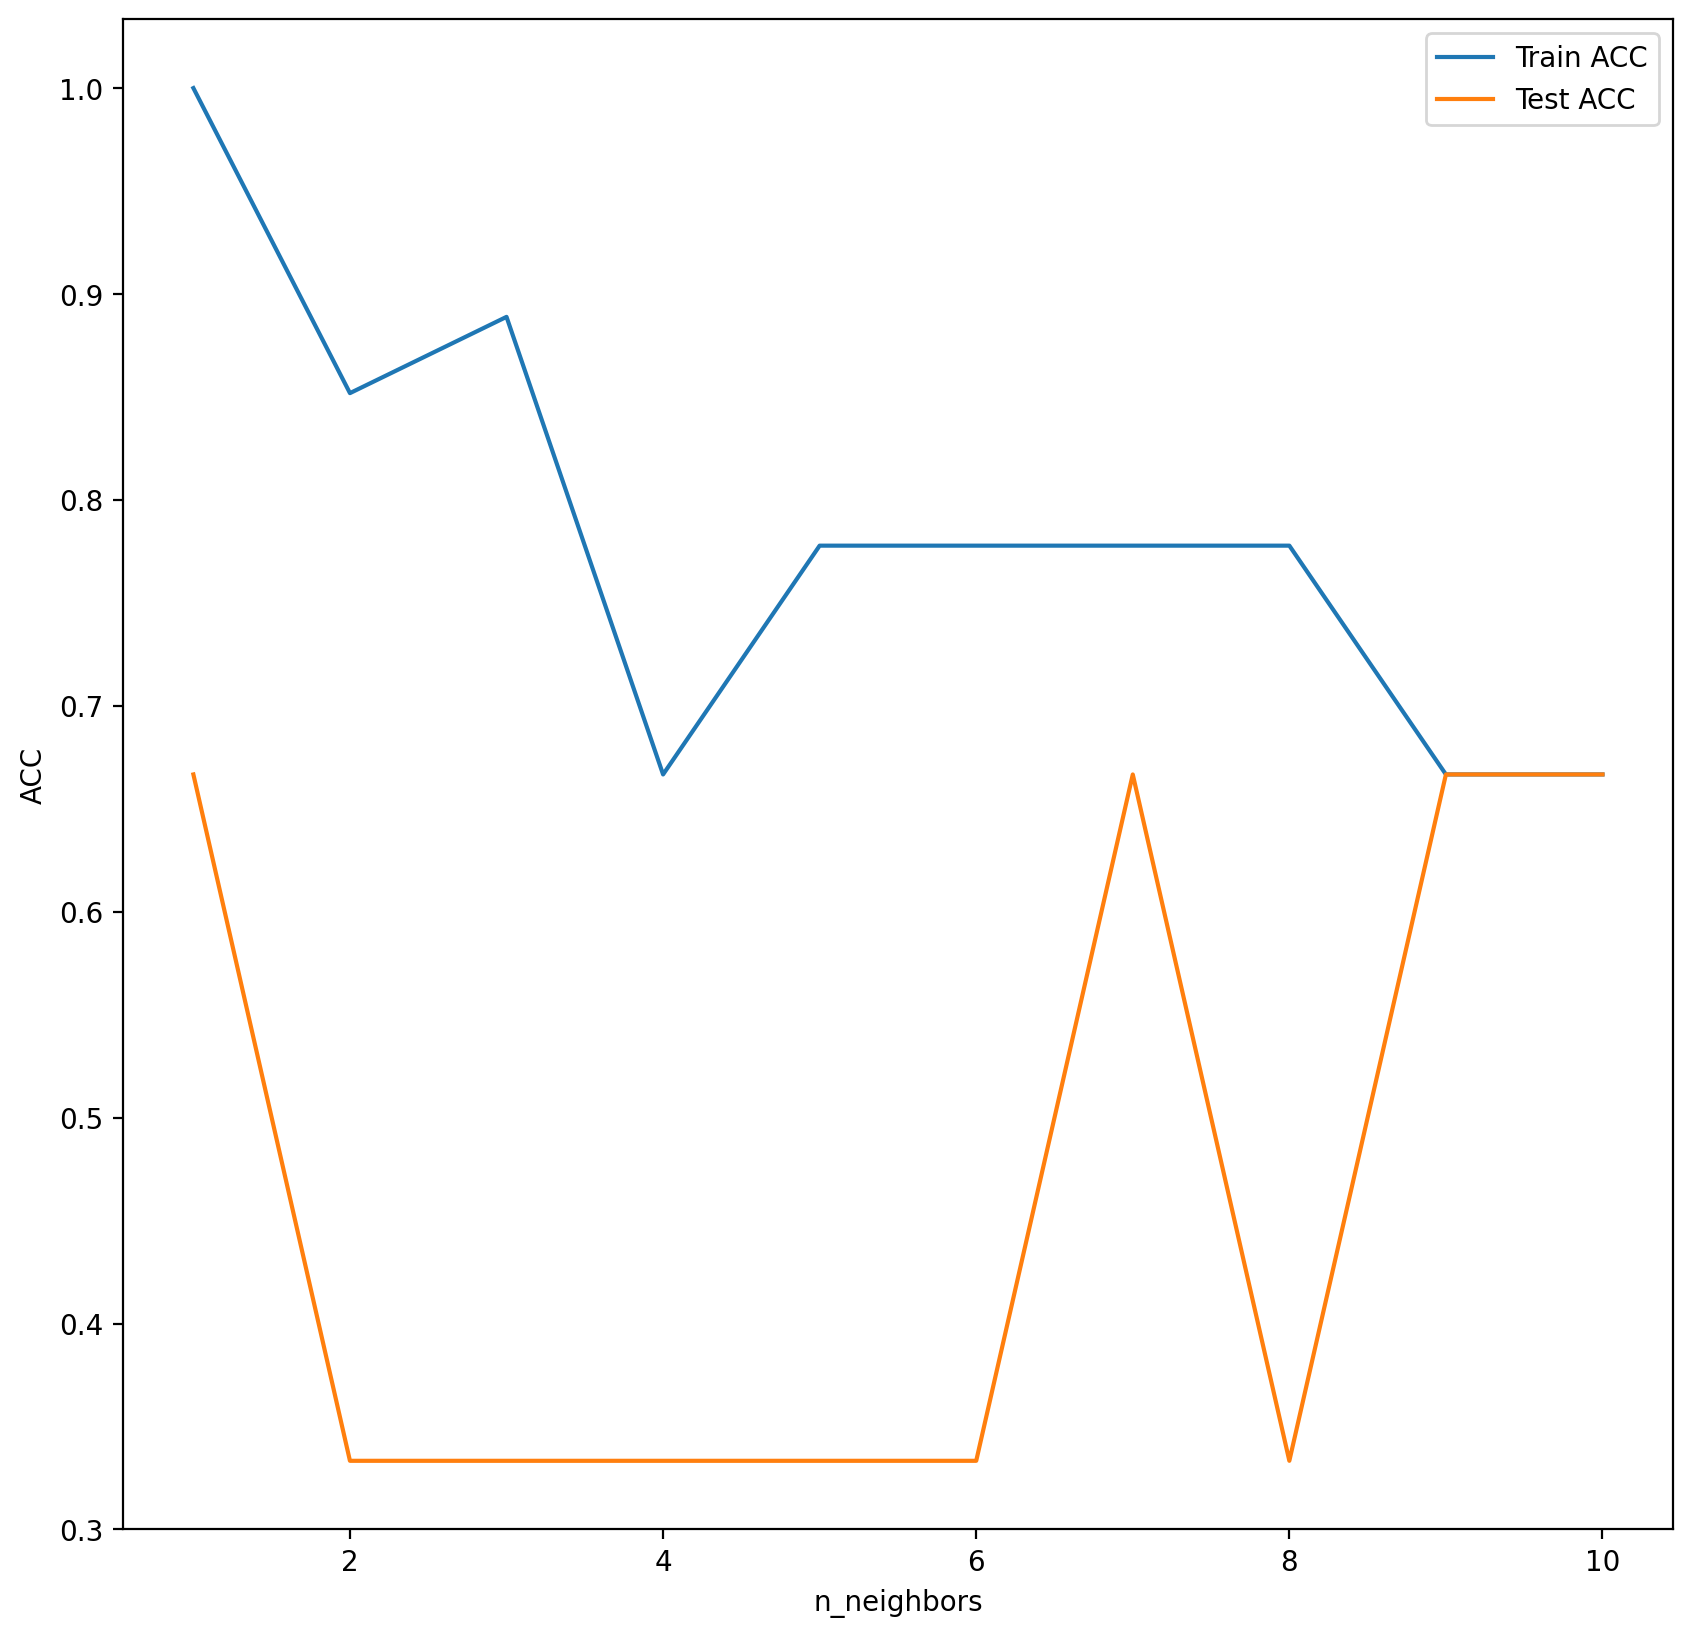

In [42]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(embedding, trny)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(embedding, trny))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(tstx_UMAP, tsty))

plt.plot(neighbors_settings, training_accuracy, label="Train ACC")
plt.plot(neighbors_settings, test_accuracy, label="Test ACC")
plt.ylabel("ACC")
plt.xlabel("n_neighbors")
plt.legend()

위 그림에서 성능이 가장 좋은 3을 선택합니다.

In [43]:
clf = neighbors.KNeighborsClassifier(n_neighbors=3).fit(embedding, trny)
clf.fit(embedding,trny)

KNeighborsClassifier(n_neighbors=3)

In [44]:
clf.score(tstx_UMAP,tsty)

0.3333333333333333

## 만약 UMAP을 사용하지 않는다면??

In [46]:
from sklearn.preprocessing import StandardScaler

# UMAP 대신 데이터 전처리를 StandardScaler이용해서 합니다.
scaler = StandardScaler()
scaler.fit(trnx)
trnx_scaled = scaler.transform(trnx)
tstx_scaled = scaler.transform(tstx)

In [47]:
#clf = neighbors.KNeighborsClassifier(n_neighbors=3).fit(trnx, trny)
#clf.fit(trnx,trny)
#clf.score(tstx_scaled,tsty)

연산시간도 많이 늘어나고<br>
(모든 점간 거리 계산을 진행하기 때문에 KNN은 데이터의 수와 차원의 개수의 따라 연산시간이 많이 차이가 난다)

#  Support Vector Machine(SVM)

![img](https://velog.velcdn.com/images/shlee0125/post/0a39784c-0859-48f7-8da0-d0a44533e73f/image.png)
https://velog.io/@shlee0125/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%A0%95%EB%A6%AC-Support-Vector-Machine-05.-Why-does-SVM-maximize-margin

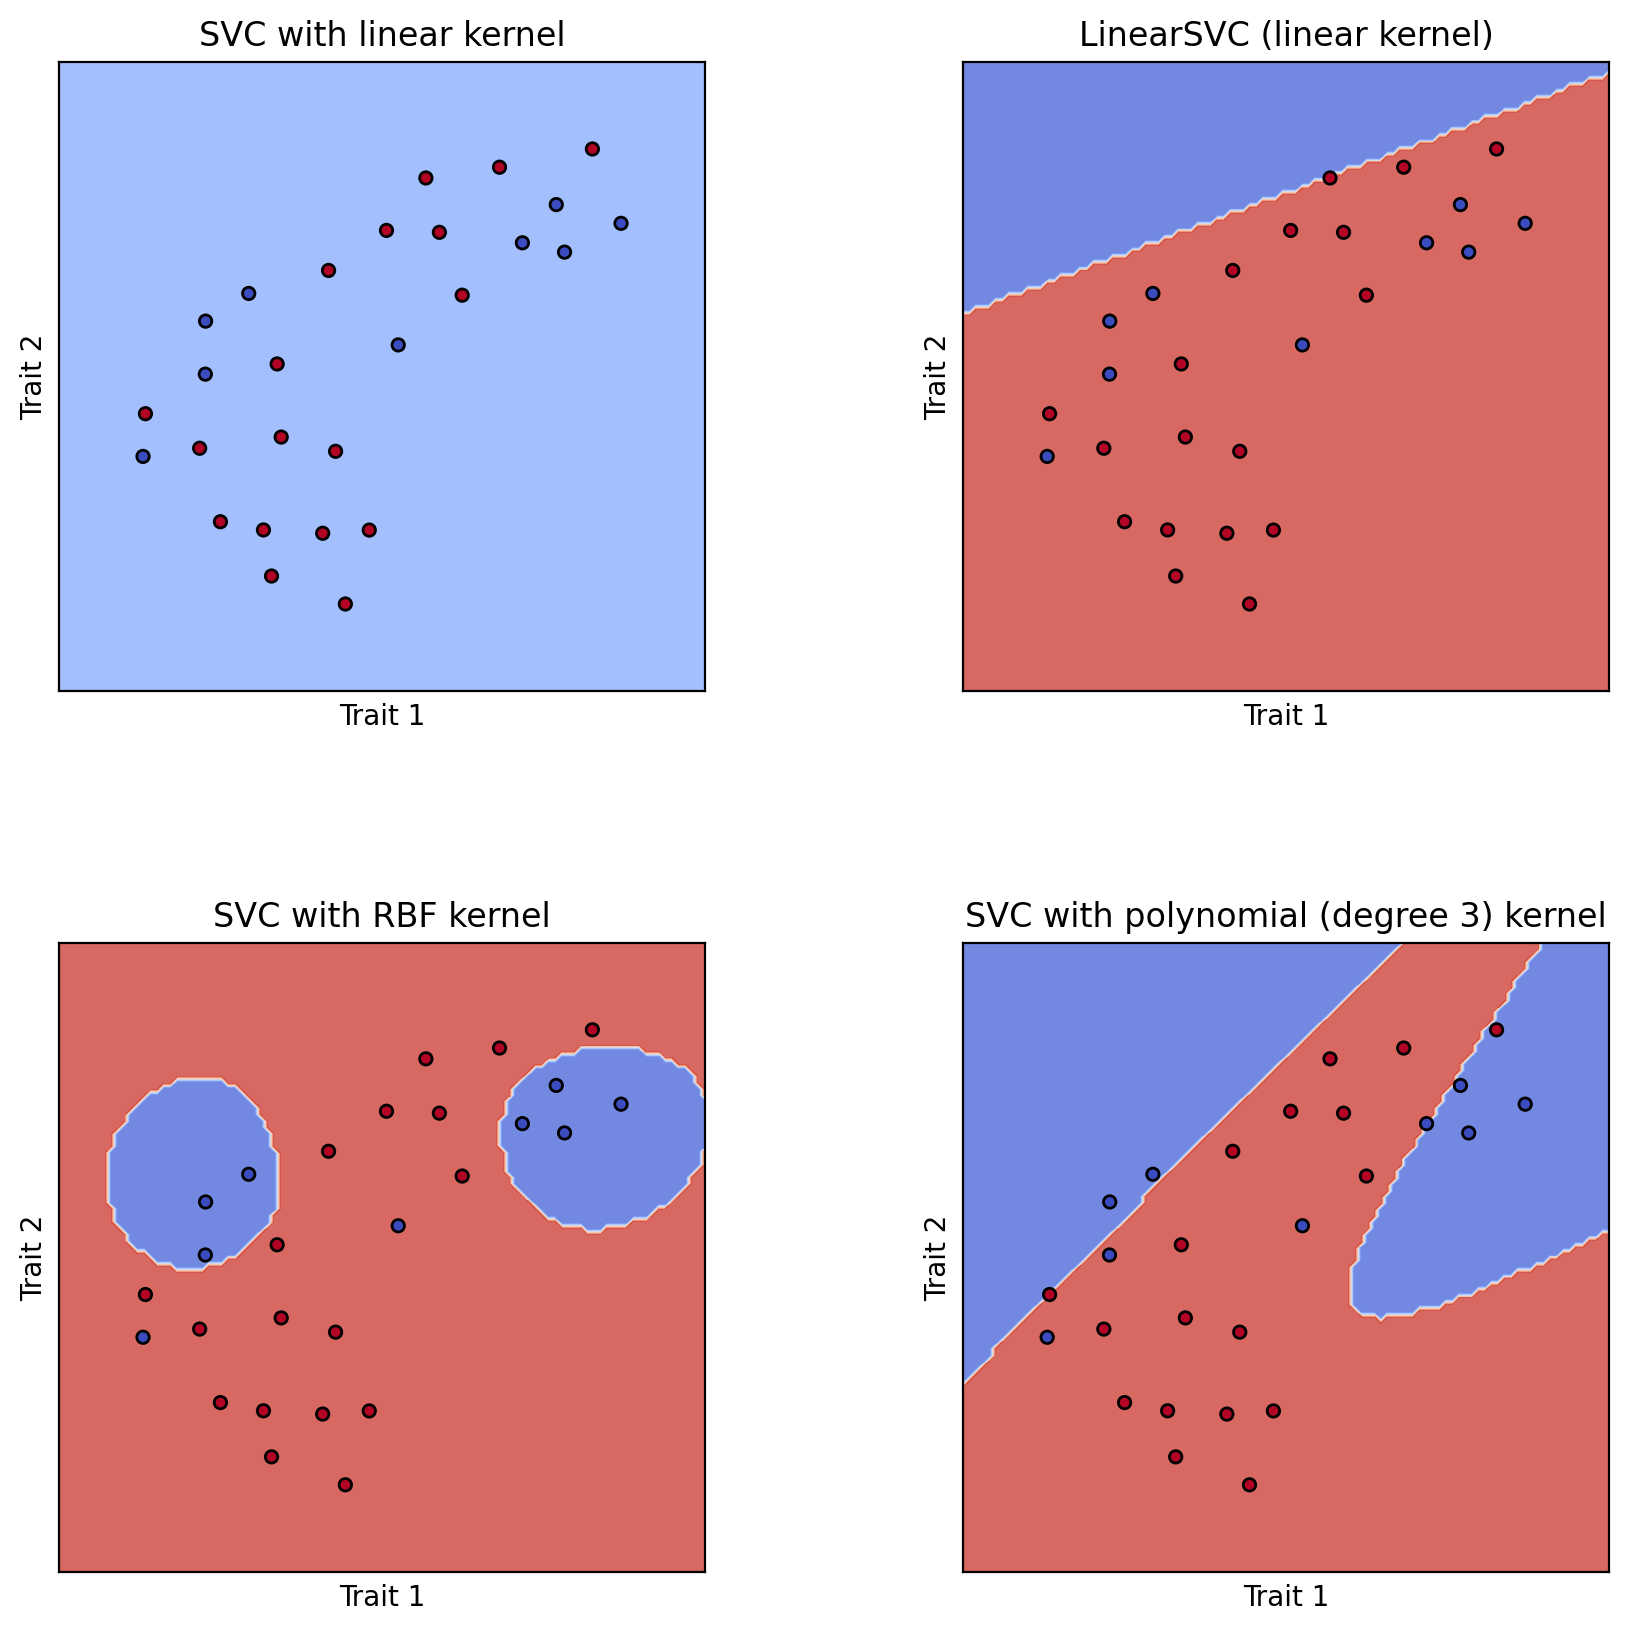

In [48]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.dpi"] = 200

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual="auto"),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(embedding, trny) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = embedding[:, 0], embedding[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        embedding,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel= "Trait 1",
        ylabel= "Trait 2",
    )
    ax.scatter(X0, X1, c=trny, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

SVM의 경우에는 너무 차원이 낮아서 오히려 성능이 저하되는 결과를 볼 수 있습니다. 

다시 차원을 올려서 확인을 해볼까요??

In [ ]:
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold


estimator = SVC(kernel="linear")


In [ ]:
selector = estimator.fit(trnx_scaled, trny)

In [ ]:
selector.score(tstx_scaled,tsty)

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
selector = RFECV(estimator, step=1, cv=StratifiedKFold(5), n_jobs=-1,scoring="accuracy")
selector = selector.fit(trnx_scaled, trny)

In [ ]:
# sns 스타일
sns.set_style('white')

# plot 사이즈
plt.rcParams["figure.figsize"] = [10, 4]
plt.rcParams["figure.dpi"] = 200

n_scores = len(selector.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(0, n_scores),
    selector.cv_results_["mean_test_score"],
    #yerr=selector.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features", fontsize=20)
plt.show()